In [ ]:
import os
# Verify the change
print("Current Working Directory: ", os.getcwd())

from definitions import quantifiers as qt
import numpy as np
import matplotlib.pyplot as plt
from definitions import FuzzyRelations as fr
from definitions import FuzzyRelations as sim
import pandas as pd
import matplotlib.pyplot as plt
from definitions import models as md

Current Working Directory:  d:\Documents\Python\FuzzyModels


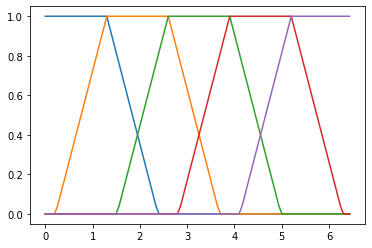

[0.04316874876065846, 1.4501943808532785, 6.486645161290324, 15.856149219562953, 25.40317271465398]
[2.045936942296252, 6.638257232049949, 16.30632258064516, 27.198754006243497, 38.486745984533016]


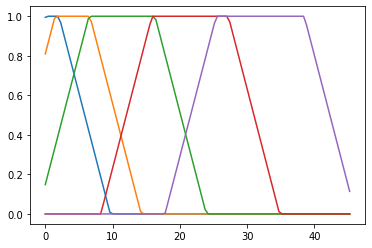

[0.97, 0.9, 0.85, 0.8, 0.75]


1


2


3


4


In [9]:
from definitions import FuzzyRelations
from definitions import models
from definitions import quantifiers
import openpyxl

from importlib import reload  # Python 3.4+
FuzzyRelations = reload(FuzzyRelations)
models = reload(models)
quantifiers = reload(quantifiers)

# read data
df = pd.read_excel('data/funcnihodnoty.xlsx')
datax=df['x']
datavalx=df['fx']

# set declination of fuzzy sets
decl=6
# set numbers (-1) of fuzzy sets on X,Y, respectively
dx=5
dy=5
# generate model from data for internaly set discretization 100 and create plots
ModelQuantifiedRules=md.QRules(datax,datavalx,dx,dy,decl)


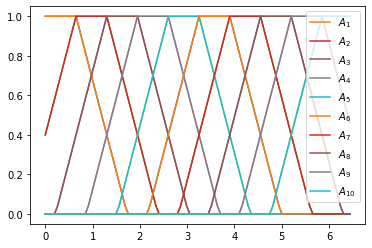

[0.38, 0.97, 2.27, 4.64, 8.31, 13.04, 17.76, 23.04, 29.42, 34.62]
[0.56, 1.38, 2.86, 5.65, 9.94, 14.5, 19.33, 25.09, 31.83, 36.8]


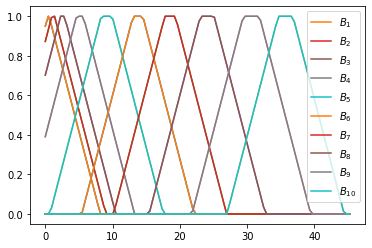

[0.95, 0.89, 0.84, 0.73, 0.57, 0.62, 0.61, 0.51, 0.46, 0.47]


1


2


3


4


5


6


7


8


9


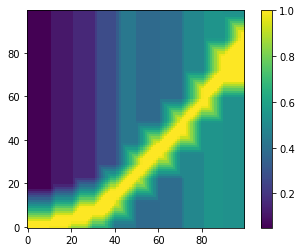

In [11]:
from definitions import FuzzyRelations
from definitions import models
from definitions import quantifiers
import openpyxl

from importlib import reload  # Python 3.4+
FuzzyRelations = reload(FuzzyRelations)
models = reload(models)
quantifiers = reload(quantifiers)

df = pd.read_excel('data/funcnihodnoty.xlsx')
datax=df['x']
datavalx=df['fx']
maxx=max(datax)
maxfx=max(datavalx)
minx=min(datax)
minfx=min(datavalx)
decl=6
dx=10
dy=10
nodesx = [minx + k * ((maxx - minx) / dx) for k in range(0,dx)]
nodesx.append(maxx+1)
# set discretization of X and Y for final plots
disx=100
x=[k*(maxx/disx) for k in range(0,disx)]
disy=100
y=[k*(maxfx/disy) for k in range(0,disy)]

# create fuzzy intervals on X for discretization of X
# plot fuzzy sets on X
fig1 = plt.figure()
for i in range(0, len(nodesx)-1):
      Aix=fr.fintervalM(x,nodesx[i],nodesx[i+1],decl/maxx)
      plt.plot(x,Aix)
      plt.plot(x, Aix, label=f"$A_{{{i+1}}}$")  # Add label for each interval
# Add legend
plt.legend(loc="upper right")
plt.show()

nodesyL = []  # Initialize the list to store weighted means-variance
nodesyR = []  # Initialize the list to store weighted means+variance
k=0.2
# Calculate weighted means for each interval
for i in range(len(nodesx) - 1):
    start_interval = nodesx[i]
    end_interval = nodesx[i + 1]
    # Calculate weights using fr.fintervalM
    weight = fr.fintervalM(datax, start_interval, end_interval, decl / maxx)
    sum_weight=sum(weight)
    # Calculate the weighted mean for the interval
    weighted_mean = sum(weight * datavalx) / sum_weight
    weighted_variance=sum(weight * abs(datavalx-weighted_mean)) / sum_weight
    nodesyL.append(round(weighted_mean-k*weighted_variance,2))
    nodesyR.append(round(weighted_mean+k*weighted_variance,2))

print(nodesyL)
print(nodesyR)

for i in range(len(nodesyL)):
      Biy=fr.fintervalM(y,nodesyL[i],nodesyR[i],decl/maxfx)
      plt.plot(y,Biy)
      plt.plot(y, Biy, label=f"$B_{{{i+1}}}$") # Add label for each interval

# Add legend
plt.legend( loc="upper right")
plt.show()

#calculate membershipvalues of data to fuzzy sets on X and Y
quantifier=[]
for i in range(len(nodesyL)):
      Ai=fr.fintervalM(datax,nodesx[i],nodesx[i+1],decl/maxx)
      Bi=fr.fintervalM(datavalx,nodesyL[i],nodesyR[i],decl/maxfx)
      table_AiBi=qt.fourftable(Ai,Bi)
      q1=qt.QConfidence(table_AiBi[0],table_AiBi[1])
      quantifier.append(q1)

print(quantifier)

A1x=fr.fintervalM(x,nodesx[0],nodesx[1],decl/maxx)
B1y=fr.fintervalM(y,nodesyL[0],nodesyR[0],decl/maxfx)
ModelRules=fr.CartImplL(A1x,B1y)
ModelQuantifiedRules=fr.implL(quantifier[0],ModelRules)
p=md.ShowModelwithData(x,y,ModelQuantifiedRules,datax,datavalx,datax*0,'1st Quantifier Based Implicative Rule')
plt.show
for i in range(1,len(nodesyL)):
      print(i)
      Aix=fr.fintervalM(x,nodesx[i],nodesx[i+1],decl/maxx)
      Biy=fr.fintervalM(y,nodesyL[i],nodesyR[i],decl/maxfx)
      ModelRules=fr.CartImplL(Aix,Biy)
      ModelQuantifiedRules=np.minimum(ModelQuantifiedRules,fr.implL(quantifier[i],ModelRules))
      p=md.ShowModelwithData(x,y,ModelQuantifiedRules,datax,datavalx,datax*0
                             ,'Quantifier Based Implicative Rule - i:'+str(i+1))
      plt.show

plt.imshow(ModelQuantifiedRules, cmap='viridis', interpolation='nearest', origin='lower')
plt.colorbar()
# Overlay the data points
#plt.scatter(datax, datavalx, color='red', label='Data Points', s=10)

# Show the plot
plt.show()


In [12]:
from definitions import quantifiers as qt
from importlib import reload  # Python 3.4+
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from importlib import reload  # Python 3.4+

#models = reload(models)
#quantifiers = reload(quantifiers)

df = pd.read_excel('data/funcnihodnoty.xlsx')
datax=df['x']
datavalx=df['fx']
minx=datax.min()
maxx=datax.max()
minfx=datavalx.min()
maxfx=datavalx.max()


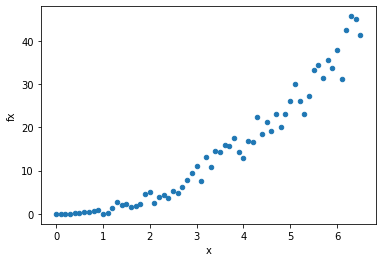

In [16]:
df = pd.read_excel('data/funcnihodnoty.xlsx')
datax=df['x']
datavalx=df['fx']
minx=datax.min()
maxx=datax.max()
minfx=datavalx.min()
maxfx=datavalx.max()
disx=100
disy=100
x=[k*(maxx/disx) for k in range(0,disx)]
y=[k*(maxfx/disy) for k in range(0,disy)]
ModelRules=md.RulesSim(datax,datavalx,disx,disy)
df.plot(x ='x', y='fx', kind = 'scatter')
p=md.ShowModelwithData(x,y,ModelRules,datax,datavalx,datax*0,'Implicative Model')

The following are Mamdani and Rules models that uses fuzzy orderings.

Figure 3 - Rules Model
Figure 4 - minimum of Mamdani and Rules

1.   Figure 1 - input data

2.   Figure 2 - Mamdani model


66


<Figure size 432x288 with 0 Axes>

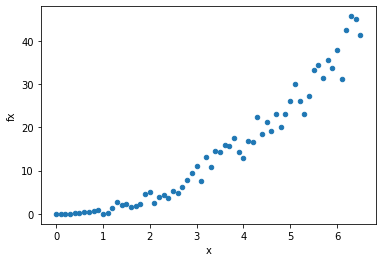

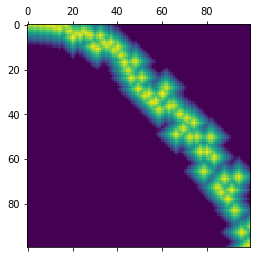

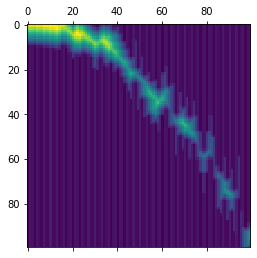

In [18]:
from importlib import reload  # Python 3.4+
#import models

#models = reload(models)

df = pd.read_excel('data/funcnihodnoty.xlsx')
s=df.shape
print(s[0])

plt.figure()
df.plot(x ='x', y='fx', kind = 'scatter')
maxx=df['x'].max()
maxvalx=df['fx'].max()

disx=100
disy=100
disnodes=10

datax=df['x']
datavalx=df['fx']

ModelMamd=md.MamdSim(datax,datavalx,disx,disy)
ModelRules=md.RulesSim(datax,datavalx,disx,disy)
plt.matshow(ModelMamd)
plt.matshow(ModelRules)